<a href="https://colab.research.google.com/github/minhbao1705/Exercise/blob/main/Public_Relations_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Analyzing Customer Sentiment
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1HfZvPCWAwKoYl1qogYlxD_CIZYxYw0aI)

![alt text](https://drive.google.com/uc?id=1XGc89Cxi0ooFQIc6o041cz8-qwXg7l3g)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import string
import sklearn

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize

import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd

# read the dataset
df = pd.read_csv ('/content/drive/MyDrive/data/amazon_alexa.tsv', sep = '\t')

# Show top 5 records
df.head ()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# TASK #3: EXPLORE DATASET

In [ ]:
#checking null values sum
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
#Checking the shape of dataframe
df.shape

(3150, 5)

In [ ]:
#the statistical anlysis of df
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
#label\taregt column value count (feedback 0 = negative , 1 = positive)

df.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

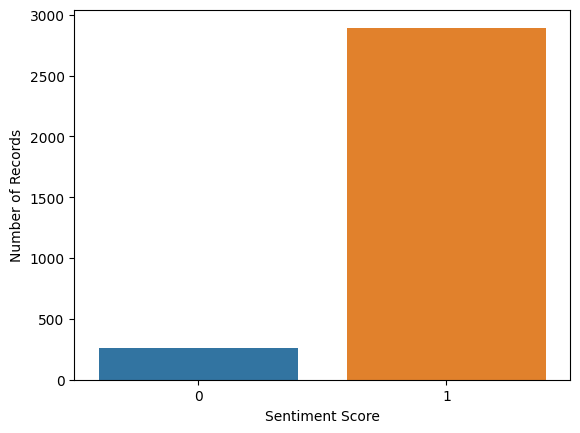

In [ ]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot (x='feedback', data = df)

# Set X-axis and Y-axis labels
plt.xlabel ('Sentiment Score')
plt.ylabel ('Number of Records')

# Show the plot using show () function
plt.show ()

In [ ]:
df['length'] = df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

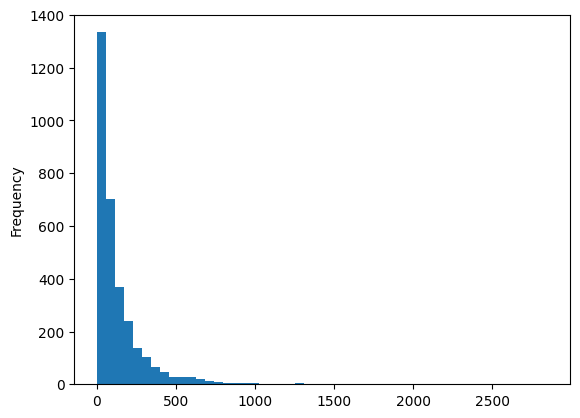

In [ ]:
%matplotlib inline
df['length'].plot(bins=50, kind='hist')

In [ ]:
df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [ ]:
df[df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

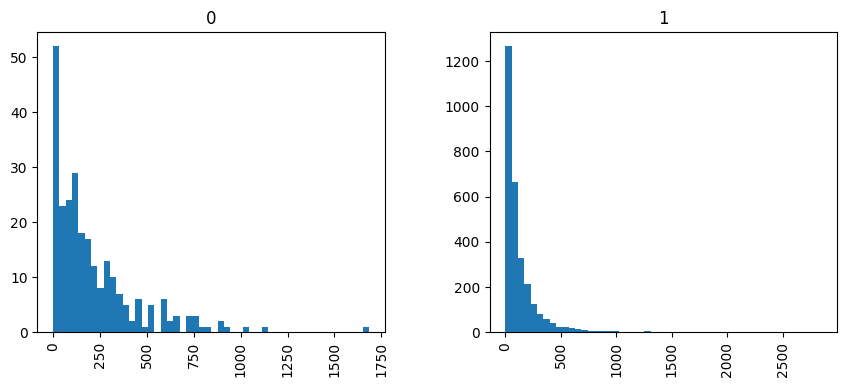

In [ ]:
df.hist(column='length', by='feedback', bins=50,figsize=(10,4))

# TASK #4: PERFORM DATA CLEANING

# TASK #5: LEARN HOW TO REMOVE PUNCTUATION FROM TEXT

# TASK 6: UNDERSTAND HOW TO REMOVE STOPWORDS

# TASK 7: UNDERSTAND HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)

![alt text](https://drive.google.com/uc?id=1eQi-Gq66e-sNw1ZvGs-zkJg95mCYdFoJ)

# TASK #8: PERFORM DATA CLEANING BY APPLYING EVERYTHING WE LEARNED SO FAR!

In [ ]:

corpus=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
# Cleaning the texts

def clean_text(txt):

    """
    removing all hashtags , punctuations, stop_words  and links, also stemming words
    """
    txt = txt.lower()
    txt = re.sub(r"(@\S+)", "", txt)  # remove hashtags
    txt = txt.translate(str.maketrans('', '', string.punctuation)) # remove punctuations
    txt = re.sub(r"(http\S+|http)", "", txt) # remove links
    txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") if word not in stop_words ]) # stem & remove stop words
    txt = ''.join([i for i in txt if not i.isdigit()]).strip() # remove digits ()
    return txt

In [ ]:
df['clean_text'] = df['verified_reviews'].apply(clean_text)
print(df.columns)

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback', 'length',
       'clean_text'],
      dtype='object')


In [ ]:
from nltk.tokenize import RegexpTokenizer
# Initialize CountVectorizer object
regex_tokenizer = RegexpTokenizer (r' [a-zA-Z] +')
count_vectorizer = CountVectorizer (lowercase=True,
                                    stop_words='english',
                                   ngram_range = (1, 1),
                                   tokenizer = regex_tokenizer.tokenize)

# Fit and transform the dataset
count_vectors = count_vectorizer.fit_transform (df ['verified_reviews'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
vectorizer = CountVectorizer(min_df=5)
X = vectorizer.fit_transform(df['clean_text'])

y = df['feedback']

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

![alt text](https://drive.google.com/uc?id=1Xox54bvjhGOhrG-fSxEUIEgw1R3g-RIt)

![alt text](https://drive.google.com/uc?id=18Z4ug4UuyQG79lyPKs1zQwtrP_S4_yoU)

![alt text](https://drive.google.com/uc?id=1sVLtg8GaE3ZhNEZX1WJbxs7KAQyQ5dpX)

![alt text](https://drive.google.com/uc?id=1NT6Fm-lWUWNsu9i8uzVS4Q5pcm5gp8RK)

![alt text](https://drive.google.com/uc?id=1C32q5Uguymr9012x1lzRD5btnvJ-kW9r)

![alt text](https://drive.google.com/uc?id=1g5aXo5E-RIjRBy6-LLLA8gjG2j9dIL5X)

![alt text](https://drive.google.com/uc?id=106OXP_z89Hqh1JYVaROIbst0N0CgFRuT)

![alt text](https://drive.google.com/uc?id=1AXTHZ9KVUsJjMm9Whc4Adi5T4OznsSYn)

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create a Gaussian Classifier
model = MultinomialNB()

# Train the model using the training sets
model.fit(X_train, y_train)

#Forecast the target variable for given test dataset
training_preds = model.predict(X_train)
training_accuracy = accuracy_score(y_train, training_preds)

testing_preds = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, testing_preds)

print(training_accuracy)
print(testing_accuracy)

0.9530805687203792
0.9182692307692307


# TASK #11: ASSESS TRAINED MODEL PERFORMANCE

![alt text](https://drive.google.com/uc?id=14_ft6Wiu-VaiU_5Ew2nS7EGGr3oLLQf8)

<Axes: >

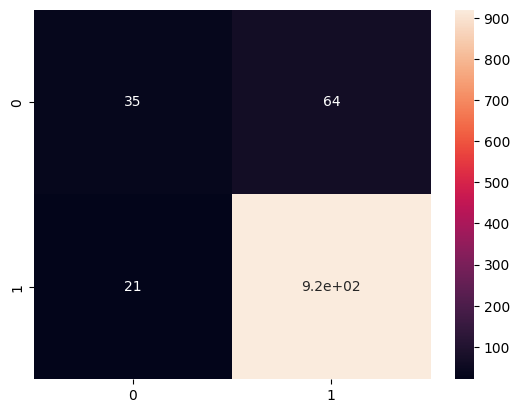

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.62      0.35      0.45        99
           1       0.93      0.98      0.96       941

    accuracy                           0.92      1040
   macro avg       0.78      0.67      0.70      1040
weighted avg       0.91      0.92      0.91      1040



# TASK #12: ASSIGNMENT - TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

training_preds = model.predict(X_train)
training_accuracy = accuracy_score(y_train, training_preds)

testing_preds = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, testing_preds)

print(training_accuracy)
print(testing_accuracy)

0.9729857819905213
0.926923076923077


<Axes: >

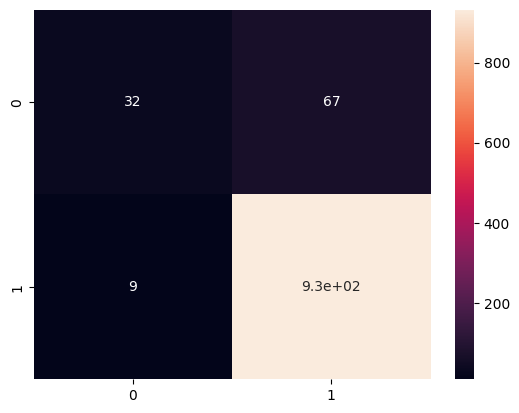

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.32      0.46        99
           1       0.93      0.99      0.96       941

    accuracy                           0.93      1040
   macro avg       0.86      0.66      0.71      1040
weighted avg       0.92      0.93      0.91      1040



# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS